In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.dates as mdates

In [4]:
data =pd.read_csv("crypto-markets.csv")

In [5]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [6]:
#set up a column with an index so I can only sample 1/10th of the dataset 
data["row_id"]= range(1, len(data) + 1)

In [7]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,row_id
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88,1
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49,2
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88,3
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17,4
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32,5


In [8]:
#drop columns I'm not using
data_=data.drop(['slug','ranknow','volume','market'], axis=1)
data_.head()

,symbol,name,date,open,high,low,close,close_ratio,spread,row_id
0,BTC,Bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.5438,3.88,1
1,BTC,Bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.7813,13.49,2
2,BTC,Bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.3843,12.88,3
3,BTC,Bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.2882,32.17,4
4,BTC,Bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.3881,33.32,5


In [9]:
data_.set_index('row_id', inplace=True)
data_.head()

,symbol,name,date,open,high,low,close,close_ratio,spread
row_id,,,,,,,,,
1,BTC,Bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.5438,3.88
2,BTC,Bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.7813,13.49
3,BTC,Bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.3843,12.88
4,BTC,Bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.2882,32.17
5,BTC,Bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.3881,33.32


In [10]:
#set date to timestamp format
data_['date'] = pd.to_datetime(data_['date'], format='%Y-%m-%d')

In [11]:
data_.tail()

,symbol,name,date,open,high,low,close,close_ratio,spread
row_id,,,,,,,,,
702162,OCOW,OCOW,2018-01-02,0.000014,0.000030,0.000013,0.000015,0.1176,0.0
702163,OCOW,OCOW,2018-01-03,0.000015,0.000031,0.000015,0.000015,0.0000,0.0
702164,OCOW,OCOW,2018-01-04,0.000015,0.000031,0.000015,0.000030,0.9375,0.0
702165,OCOW,OCOW,2018-01-05,0.000030,0.000032,0.000016,0.000017,0.0625,0.0
702166,OCOW,OCOW,2018-01-06,0.000017,0.000017,0.000016,0.000017,1.0000,0.0


In [12]:
#show if each one closed up or down each day
data_['pos_neg']= data_['open']-data_['close']
data_.head()
#create a binary column - 0 = gain, 1 = loss to have something to predict
data_['Up/Down'] = np.where(data_['pos_neg']>0, '0', '1')

In [13]:
data_.head()

,symbol,name,date,open,high,low,close,close_ratio,spread,pos_neg,Up/Down
row_id,,,,,,,,,,,
1,BTC,Bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.5438,3.88,1.09,0
2,BTC,Bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.7813,13.49,-10.10,1
3,BTC,Bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.3843,12.88,5.00,0
4,BTC,Bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.2882,32.17,22.01,0
5,BTC,Bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.3881,33.32,11.17,0


In [14]:
sixtest=data_.drop('date',axis=1).drop('name',axis=1)
sixtest.head()

,symbol,open,high,low,close,close_ratio,spread,pos_neg,Up/Down
row_id,,,,,,,,,
1,BTC,135.30,135.98,132.10,134.21,0.5438,3.88,1.09,0
2,BTC,134.44,147.49,134.00,144.54,0.7813,13.49,-10.10,1
3,BTC,144.00,146.93,134.05,139.00,0.3843,12.88,5.00,0
4,BTC,139.00,139.89,107.72,116.99,0.2882,32.17,22.01,0
5,BTC,116.38,125.60,92.28,105.21,0.3881,33.32,11.17,0


In [19]:
sixtest.isnull().sum()

symbol         0
open           0
high           0
low            0
close          0
close_ratio    0
spread         0
pos_neg        0
Up/Down        0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X = sixtest[['open', 'high', 'low','close','spread']]
y = sixtest['Up/Down']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [23]:
X_test.tail()

,open,high,low,close,spread
row_id,,,,,
454218,0.002437,0.003931,0.002437,0.002597,0.00
376519,0.086977,0.090332,0.077702,0.086280,0.01
363453,0.007233,0.007711,0.007174,0.007251,0.00
70608,0.000025,0.000025,0.000022,0.000022,0.00
653821,0.000208,0.000279,0.000178,0.000234,0.00


In [24]:
y_pred = logmodel.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
score = logmodel.score(X_test, y_test)
print("Accurancy of model:",score)

Accurancy of model: 0.7512841205791597


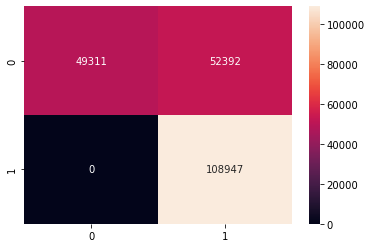

In [26]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

In [27]:
y_pred[10:20]

array(['1', '0', '1', '1', '1', '1', '1', '1', '1', '1'], dtype=object)

In [28]:
y_test[10:20]

row_id
387636    0
250677    0
114245    1
569158    1
52617     1
161665    0
332295    0
168325    1
664786    1
445534    1
Name: Up/Down, dtype: object